<a href="https://colab.research.google.com/github/olgakargan/Array/blob/master/%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BA%D0%B0%D1%80%D1%82%D0%BE%D1%87%D0%B5%D0%BA_%D0%9F%D0%9A_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кейс

К Вам обратился клиент, который занимается сборкой и продажей персональных компьютеров (за исключением миниПК и моноблоков). В связи с ростом популярности интернет-магазинов, таких как Wildberries, Ozon, OnlineTrade и т.п., за последние несколько лет, а также с целью привлечения большего числа клиентов при одновременном снижении затрат на содержание собственного магазина, доставку и рекламу товаров он планирует выйти на онлайн-рынок. В связи с этим клиент хотел бы узнать, от чего зависит цена, а также популярность персональных компьютеров, выкладываемых на онлайн-площадках, чтобы в дальнейшем планировать к сборке востребованные по техническим характеристикам компьютеры и продавать их по конкурентной цене.
<br>Специалистом по сбору данных был выгружен файл в формате csv с одного из популярных онлайн-магазинов, содержащий информацию о товарах категории "Компьютеры и моноблоки".
<br>Проанализируйте полученные данные и представьте аналитический отчет, содержащий выводы и рекомендации для Заказчика, которые помогут ему для решения своих бизнес-задач.

# Импорт библиотек

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re

pd.options.display.max_rows = 8

# Предобработка данных

In [ ]:
!gdown --id 1lRHPpoX8PaxcoUDeSMN-smJA5NTCREbM
df = pd.read_csv('final_task.csv')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lRHPpoX8PaxcoUDeSMN-smJA5NTCREbM
To: /content/final_task.csv
100% 3.97M/3.97M [00:00<00:00, 69.1MB/s]


In [ ]:
df1 = df.copy()

## Обзор файла

In [ ]:
df1.sample(5)

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
1375,119350354,Игровой Компьютер Robotcomp ТУ 160 V3 Plus,110184₽,Купили менее 5 раз,0 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce RTX 3050,Windows 10 Pro,3 Года (36 месяцев),Россия,"{'Ширина предмета': '21 см', 'Глубина предмета...","{'Длина упаковки': '46 см', 'Ширина упаковки':..."
3358,148232467,Игровой компьютер /16GB/SSD-256/HDD-500/Монито...,70800₽,NaN,0 отзывов,Компьютерс,4.5,"{'Процессор_тип': 'Intel E3', 'Количество ядер...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': '500 Гб', 'Объем нако...",NVIDIA GeForce GTX 950,Windows,1 год,Россия,"{'Ширина предмета': '40 см', 'Глубина предмета...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."
3804,151039380,Игровой компьютер Strateg M3 White,72864₽,NaN,0 отзывов,M-Bit,0.0,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce RTX 3050,Windows 11 Pro,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."
4031,151550938,Офисный компьютер Calibre +,31000₽,NaN,0 отзывов,M-Bit,0.0,"{'Процессор_тип': 'Intel Core i3', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 730,Windows 11 Pro,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."
3782,150964162,Игровой компьютер Shooter M3 White,63624₽,NaN,0 отзывов,M-Bit,0.0,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,Windows 11 Pro,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."


In [ ]:
df.shape

(4500, 16)

## Проверка пустых значений

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     4500 non-null   int64  
 1   title                          4500 non-null   object 
 2   price                          4499 non-null   object 
 3   sales                          1164 non-null   object 
 4   feedbacks                      4500 non-null   object 
 5   seller                         4391 non-null   object 
 6   seller_rating                  4389 non-null   float64
 7   Процессор                      4500 non-null   object 
 8   Оперативная память             4500 non-null   object 
 9   Жесткий диск                   4500 non-null   object 
 10  Видеопроцессор                 4500 non-null   object 
 11  Операционная система           4500 non-null   object 
 12  Гарантийный срок               2648 non-null   o

## Проверка на дубликаты

In [ ]:
df1.duplicated().sum()

490

In [ ]:
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True, inplace=True)

In [ ]:
df1.shape

(4010, 16)

## Выбор признаков для анализа

In [ ]:
df1.columns

Index(['product_id', 'title', 'price', 'sales', 'feedbacks', 'seller',
       'seller_rating', 'Процессор', 'Оперативная память', 'Жесткий диск',
       'Видеопроцессор', 'Операционная система', 'Гарантийный срок',
       'Страна производства', 'Габариты товара',
       'Габариты товара (с упаковкой)'],
      dtype='object')

In [ ]:
columns = ['feedbacks', 'seller', 'seller_rating', 'Операционная система','Гарантийный срок', 'Страна производства',
           'Габариты товара', 'Габариты товара (с упаковкой)']

In [ ]:
df1.drop(columns=columns, inplace=True)
df1.shape

(4010, 8)

In [ ]:
values1 = ['компьютер', 'пк', 'системный блок']
values2 = ['мини','микро']
df1 = df1[df1.title.str.lower().str.contains('|'.join(values1))]
df1 = df1[~df1.title.str.lower().str.contains('|'.join(values2))]

In [ ]:
df1.shape

(3553, 8)

## Распаковка данных

In [ ]:
df1.head(2)

,product_id,title,price,sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics
1,17877962,Системный блок,32900₽,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено




---


***price***

---



In [ ]:
df1.price = df1.price.apply(lambda x: x[:-1] if pd.notna(x) else np.nan)
df1.price

0       10805
1       32900
2       35720
3       39237
        ...  
4006    70000
4007    70000
4008    70000
4009    70000
Name: price, Length: 3553, dtype: object

In [ ]:
df1.price.isna().sum()

1

In [ ]:
df1[df1.price.isna()==True]

,product_id,title,price,sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор
1693,141714708,Системный блок Azerty AZ-0102,NaN,Купили более 10 раз,"{'Процессор_тип': 'Intel Xeon', 'Количество яд...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Radeon RX580 8Gb


In [ ]:
df1.dropna(subset=['price'], inplace=True)
df1.price = df1.price.astype('int64')



---


***sales***


---



In [ ]:
df1.sales.unique()

array(['Купили более 400 раз', nan, 'Купили более 10 раз',
       'Купили более 200 раз', 'Купили более 40 раз',
       'Купили более 5 раз', 'Купили более 30 раз', 'Купили более 20 раз',
       'Купили более 50 раз', 'Купили менее 5 раз',
       'Купили более 500 раз', 'Купили более 100 раз',
       'Купили более 80 раз', 'Купили более 800 раз',
       'Купили более 90 раз', 'Купили более 70 раз',
       'Купили более 300 раз', 'Купили более 60 раз'], dtype=object)

Создадим дополнительный столбец, вытащив количество продаж

In [ ]:
sales_int = {
    'Купили менее 5 раз': 1,
    'Купили более 5 раз': 5,
    'Купили более 10 раз': 10,
    'Купили более 20 раз': 20,
    'Купили более 30 раз': 30,
    'Купили более 40 раз': 40,
    'Купили более 50 раз': 50,
    'Купили более 60 раз': 60,
    'Купили более 70 раз': 70,
    'Купили более 80 раз': 80,
    'Купили более 90 раз': 90,
    'Купили более 100 раз': 100,
    'Купили более 200 раз': 200,
    'Купили более 300 раз': 300,
    'Купили более 400 раз': 400,
    'Купили более 500 раз': 500,
    'Купили более 800 раз': 800
}

In [ ]:
df1['sales'] = df1['sales'].apply(lambda x: sales_int[x] if pd.notna(x) else 0)

In [ ]:
sorted(df1['sales'].unique())

[0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 800]



---

***Процессор***

---



In [ ]:
df1['Процессор'][0]

"{'Процессор_тип': 'Intel Celeron', 'Количество ядер процессора': '2'}"

In [ ]:
df1['Процессор_тип'] = df1['Процессор'].apply(lambda x: eval(x)['Процессор_тип'])
df1['Количество ядер процессора'] = df1['Процессор'].apply(lambda x: eval(x)['Количество ядер процессора'])

In [ ]:
df1['Процессор_тип'].unique()

array(['Intel Celeron', 'Intel Core i5', 'не заполнено', 'Intel Core i3',
       'AMD Ryzen 5', 'AMD Athlon', 'Intel Core i7', 'Intel Core i9',
       'AMD Ryzen 3', 'Gemini Lake Refresh J4115', 'Intel Core 12400F',
       'Intel Pentium', 'Intel', 'Intel Xeon', '6010', 'AMD Ryzen 7',
       '12400f', 'AMD A6', '8 ядер', 'Intel 4 ядра', 'AMD A12-9800E',
       'AMD E1-6010', 'AMD RYZEN 4600g Vega7 арт. 100343717',
       'Intel N5105', 'AMD Ryzen 6',
       'AMD RYZEN 4600g Vega7 арт. 143553804',
       'Intel Atom DualCore D2550 Cedar Trail', 'AMD Ryzen 9',
       'A10-5800KRAM', 'AMD FX-4300', 'AMD FX-6100', 'Intеl Quad Q9400',
       'Intеl Quad 9400', 'Intel E5', 'Intel Core Quad 9400', 'Intel E3',
       'AMD Radeon RX 570', 'Q9400', 'Intеl Quad', 'Ryzen; 3 1300x',
       'intel core i 3 10100f', 'Intel Core i 5 10400f',
       'Intel core 12400F', 'intel core i 5 10400f', 'AMD рязань 5 5600x',
       'AMD рязань 5 4650'], dtype=object)

In [ ]:
df1.loc[df1[df1['Процессор_тип'].str.lower().str.contains('|'.join(['intеl','intel','gemini lake refresh j4115','12400f','q9400']))==True].index,'Type_Processor'] = 'intel'
df1.loc[df1[df1['Процессор_тип'].str.lower().str.contains('|'.join(['amd','6010','a10-5800kram','ryzen; 3 1300x','cortex-a53']))==True].index,'Type_Processor'] = 'amd'
df1.loc[df1[df1['Процессор_тип'].str.lower().str.contains('|'.join(['amd','intel']))==False].index,'Type_Processor'] = 'не известно'

In [ ]:
df1['Type_Processor'].unique()

array(['intel', 'не известно', 'amd'], dtype=object)

In [ ]:
df1.loc[df1[df1['Количество ядер процессора']=='не заполнено'].index,'Количество ядер процессора']='0'
df1['Количество ядер процессора']=df1['Количество ядер процессора'].astype('str')
df1['Количество ядер процессора'].unique()

array(['2', '0', '6', '10', '4', '12', '16', '8', '2 ядра', '6 ядер',
       '4 ядра', '8 ядер', '14', '20', '24 ядра'], dtype=object)

In [ ]:
def clear_Processor_Core(Processor_Core):
  return int(re.findall('\d+', Processor_Core)[0])

In [ ]:
df1['Processor_Core'] = df1['Количество ядер процессора'].apply(clear_Processor_Core)

In [ ]:
sorted(df1['Processor_Core'].unique())

[0, 2, 4, 6, 8, 10, 12, 14, 16, 20, 24]



---

***Оперативная память***

---



In [ ]:
df1['Оперативная память'][0]

"{'Тип оперативной памяти': 'DDR 3', 'Объем оперативной памяти (Гб)': '4 ГБ'}"

In [ ]:
df1['Тип оперативной памяти'] = df1['Оперативная память'].apply(lambda x: eval(x)['Тип оперативной памяти'])
df1['Объем оперативной памяти (Гб)'] = df1['Оперативная память'].apply(lambda x: eval(x)['Объем оперативной памяти (Гб)'])

In [ ]:
df1['Тип оперативной памяти'].unique()

array(['DDR 3', 'не заполнено', 'DDR 4', 'DDR 5', '16', '16 Гб',
       'RAM 16 ГБ'], dtype=object)

In [ ]:
df1.loc[df1[df1['Тип оперативной памяти'].str.contains('16')==True].index,'Тип оперативной памяти']='не заполнено'

In [ ]:
df1.rename(columns = {'Тип оперативной памяти':'Type_RAM'}, inplace = True )
df1['Type_RAM'].unique()

array(['DDR 3', 'не заполнено', 'DDR 4', 'DDR 5'], dtype=object)

In [ ]:
df1['Объем оперативной памяти (Гб)']=df1['Объем оперативной памяти (Гб)'].fillna(0).astype('str')
df1['Объем оперативной памяти (Гб)'].unique()

array(['4 ГБ', '16 ГБ', '8', '16', '32', '6 ГБ', '0', '32 ГБ', '8 ГБ',
       '16 гб', '4', '64', '8 GB', '240 гб', '8 Гб', '64 ГБ', '32 гб',
       '16ГБ', '8 гб', '16 gb', '16 Гб', '4 GB', '2', '1000 гб', '64 гб',
       '16 Gb', '4 гб'], dtype=object)

In [ ]:
def clear_RAM(RAM):
  return int(re.findall('\d+', RAM)[0])

In [ ]:
df1['RAM_Gb'] = df1['Объем оперативной памяти (Гб)'].apply(clear_RAM)

In [ ]:
sorted(df1['RAM_Gb'].unique())

[0, 2, 4, 6, 8, 16, 32, 64, 240, 1000]

Объем оперативной памяти у современных ПК от 4 до 64, остальные некорректные значения удаляем

In [ ]:
df1=df1[(df1['RAM_Gb']!=2)&(df1['RAM_Gb']<=64)]



---

***Жесткий диск***

---



In [ ]:
df1['Жесткий диск'][0]

"{'Объем накопителя HDD': None, 'Объем накопителя SSD': None}"

In [ ]:
df1['Объем накопителя HDD'] = df1['Жесткий диск'].apply(lambda x: eval(x)['Объем накопителя HDD'])
df1['Объем накопителя SSD'] = df1['Жесткий диск'].apply(lambda x: eval(x)['Объем накопителя SSD'])

<ipython-input-1273-32c23d2e77fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Объем накопителя HDD'] = df1['Жесткий диск'].apply(lambda x: eval(x)['Объем накопителя HDD'])


In [ ]:
df1[['Объем накопителя HDD','Объем накопителя SSD']]=df1[['Объем накопителя HDD','Объем накопителя SSD']].fillna(0)
df1['Объем накопителя HDD']=df1['Объем накопителя HDD'].astype('str').str.lower()
df1['Объем накопителя SSD']=df1['Объем накопителя SSD'].astype('str').str.lower()

In [ ]:
df1['Объем накопителя HDD'].unique()

array(['0', '1000 гб', '2000 гб', '1 тб', '2000gb', '1tb', '500', 'нет',
       '2tb', '1 tb', 'нет; без hdd', 'без hdd', '500 гб', '500 gb',
       '1000 gb', '3000 гб', '1000', '2 тб', '512 гб', 'отсутствует',
       '250 гб', '256 гб', '4000 гб; 4000', '1000gb', '500; 500 гб',
       '1024 гб'], dtype=object)

In [ ]:
HDD_int = {'0':0, '1000 гб':1000, '2000 гб':2000, '1 тб':1000, '2000gb':2000, '1tb':1000, '500':500, 'нет':0,
       '2tb':2000, '1 tb':1000, 'нет; без hdd':0, 'без hdd':0, '500 гб':500, '500 gb':500,
       '1000 gb':1000, '3000 гб':3000, '1000':1000, '2 тб':2000, '512 гб':500, 'отсутствует':0,
       '250 гб':250, '256 гб':250, '4000 гб; 4000':4000, '1000gb':1000, '500; 500 гб':500,
       '1024 гб':1000}

In [ ]:
df1['HDD'] = df1['Объем накопителя HDD'].apply(lambda x: HDD_int[x] if pd.notna(x) else 0)

In [ ]:
sorted(df1['HDD'].unique())

[0, 250, 500, 1000, 2000, 3000, 4000]

In [ ]:
df1['Объем накопителя SSD'].unique()

array(['0', '256 гб', '512 гб', '480 гб', '960 гб', '2 тб', '240 гб',
       '1000gb pci-e', '128 гб', '480gb', '240gb', '120 гб', '256gb',
       '120gb', '120', '512gb', '500gb', '960gb', '512', '128', '256',
       '1000gb', '480 gb', '120 gb', '240 gb', '512гб арт. 100343717',
       '1000 гб', '1024 гб', '250 гб', '480', '500 гб', '1240 гб',
       '1480 гб', '1 тб', '512 gb', '2000', '2000 гб', '240',
       '512 гб m.2 pcie', '64 гб', '256 gb ssd', '512гб', '256 gb',
       '1000', '512гб арт. 143553804', '1000 gb', '60 gb', '240; 240 гб',
       '250', '128; 128 гб', '500', '1500 гб', '480; 960', '1500',
       '256 гб; 960 гб', '256 гб + 1 tb', '1000гб арт. 152611584'],
      dtype=object)

In [ ]:
SSD_int = {'0':0, '256 гб':256, '512 гб':512, '480 гб':480, '960 гб':1000, '2 тб':2000, '240 гб':240,
       '1000gb pci-e':1000, '128 гб':128, '480gb':480, '240gb':240, '120 гб':120, '256gb':256,
       '120gb':120, '120':120, '512gb':512, '500gb':500, '960gb':1000, '512':512, '128':128, '256':256,
       '1000gb':1000, '16 гб':16, '480 gb':480, '120 gb':120, '240 gb':240,
       '512гб арт. 100343717':512, '1000 гб':1000, '1024 гб':1000, '250 гб':256, '480':480,
       '500 гб':500, '1240 гб':1500, '1480 гб':1500, '1 тб':1000, '512 gb':512, '2000':2000,
       '2000 гб':2000, '240':240, '512 гб m.2 pcie':512, '64 гб':64, '256 gb ssd':256,
       '512гб':512, '256 gb':256, '1000':1000, '512гб арт. 143553804':512, '1000 gb':1000,
       '60 gb':64, '240; 240 гб':240, '250':256, '128; 128 гб':128, '500':500, '1500 гб':1500,
       '480; 960':480, '1500':1500, '256 гб; 960 гб':256, '256 гб + 1 tb':256,
       '1000гб арт. 152611584':1000}

In [ ]:
df1['SSD'] = df1['Объем накопителя SSD'].apply(lambda x: SSD_int[x] if pd.notna(x) else 0)

In [ ]:
sorted(df1['SSD'].unique())

[0, 64, 120, 128, 240, 256, 480, 500, 512, 1000, 1500, 2000]

Так как производители выпускают устройства объёмом от 120 Гб до 32 Тб, то значения до 120 Гб удаляем

In [ ]:
df1=df1[(df1['SSD']!=64)&(df1['SSD']!=16)]

In [ ]:
columns = ['Видеопроцессор','Процессор', 'Оперативная память', 'Жесткий диск','Количество ядер процессора',
           'Объем оперативной памяти (Гб)','Объем накопителя SSD','Объем накопителя HDD']

In [ ]:
df1.drop(columns=columns, inplace=True)
df1.shape

<ipython-input-1285-80c90f614317>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=columns, inplace=True)


(3546, 11)

In [ ]:
df1[(df1['HDD']==0)&(df1['SSD']==0)&(df1['Type_RAM']=='не заполнено')&(df1['Type_Processor']=='не известно')&(df1['Processor_Core']==0)]

,product_id,title,price,sales,Процессор_тип,Type_Processor,Processor_Core,Type_RAM,RAM_Gb,HDD,SSD
77,37982087,Компьютер,777,1,не заполнено,не известно,0,не заполнено,0,0,0
78,37982255,Компьютер,662,1,не заполнено,не известно,0,не заполнено,0,0,0
79,37982823,Компьютер,605,5,не заполнено,не известно,0,не заполнено,0,0,0
80,38113745,Компьютер,1065,1,не заполнено,не известно,0,не заполнено,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3689,151706241,Системный Ryzen 5 2600 компьютер игровой,69300,0,не заполнено,не известно,0,не заполнено,0,0,0
3690,151706242,Системный Ryzen 5 2600 компьютер игровой,82500,0,не заполнено,не известно,0,не заполнено,0,0,0
3691,151706244,Системный Ryzen 5 2600 компьютер игровой,46200,0,не заполнено,не известно,0,не заполнено,0,0,0
3698,151710523,Системный блок Ryzen 4600G компьютер игровой,36850,0,не заполнено,не известно,0,не заполнено,0,0,0


In [ ]:
df1=df1.drop(df1[(df1['HDD']==0)&(df1['SSD']==0)&(df1['Type_RAM']=='не заполнено')&(df1['Type_Processor']=='не известно')&(df1['Processor_Core']==0)].index)
df1.shape

(3372, 11)

In [ ]:
df1.reset_index(drop=True, inplace=True)
df1.head(2)

,product_id,title,price,sales,Процессор_тип,Type_Processor,Processor_Core,Type_RAM,RAM_Gb,HDD,SSD
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400,Intel Celeron,intel,2,DDR 3,4,0,0
1,17877962,Системный блок,32900,0,Intel Core i5,intel,0,не заполнено,16,0,256


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3372 entries, 0 to 3371
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      3372 non-null   int64 
 1   title           3372 non-null   object
 2   price           3372 non-null   int64 
 3   sales           3372 non-null   int64 
 4   Процессор_тип   3372 non-null   object
 5   Type_Processor  3372 non-null   object
 6   Processor_Core  3372 non-null   int64 
 7   Type_RAM        3372 non-null   object
 8   RAM_Gb          3372 non-null   int64 
 9   HDD             3372 non-null   int64 
 10  SSD             3372 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 289.9+ KB


# Анализ данных

In [ ]:
def histogram(series):
    plt.hist(series.dropna(), bins=50)
    plt.axvline(series.median(), color='r', linestyle='dashed', linewidth=1)
    plt.axvline(series.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(series.median()*1.05, max_ylim*0.9, 'Median: {:.2f}'.format(series.median()), color='r')
    plt.text(series.mean()*1.05, max_ylim*0.8, 'Mean: {:.2f}'.format(series.mean()))
    plt.show()

title - категориальный (некатегоризованный)

price - количественный непрерывный

sales - количественный дискретный

Type_Processor - категориальный (категоризованный)

Processor_Core - количественный дискретный

Type_RAM - категориальный (категоризованный)

RAM_Gb - количественный дискретный

HDD - количественный дискретный

SSD - количественный дискретный

## От чего зависит цена

### Анализ числовых признаков

In [ ]:
df1.price.describe()

count      3372.000000
mean      67841.862100
std       32648.938837
min       10805.000000
25%       40006.000000
50%       66825.000000
75%       84158.250000
max      235900.000000
Name: price, dtype: float64

In [ ]:
df1.price.skew() # коэффициент асимметрии

0.9417577916473481

In [ ]:
df1.price.kurtosis() # коэффициент эксцесса

1.4401041282827762

In [ ]:
# проверка на нормальность
stats.shapiro(df1.price)

ShapiroResult(statistic=0.9416441321372986, pvalue=1.4941628337242958e-34)

Распределение не является нормальным

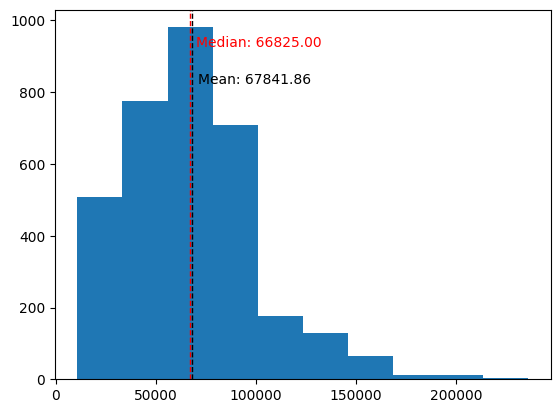

In [ ]:
plt.hist(df1.price.dropna())
plt.axvline(df1.price.median(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df1.price.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df1.price.median()*1.05, max_ylim*0.9, 'Median: {:.2f}'.format(df1.price.median()), color='r')
plt.text(df1.price.mean()*1.05, max_ylim*0.8, 'Mean: {:.2f}'.format(df1.price.mean()))
plt.show()

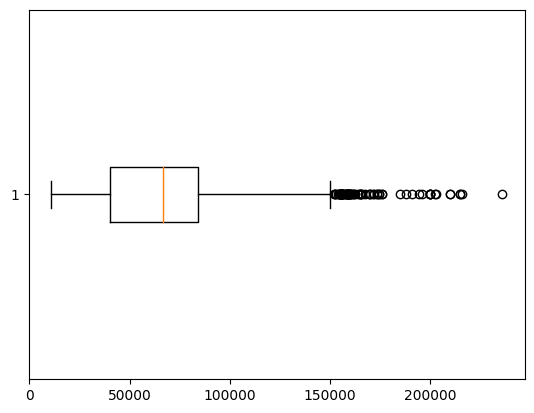

In [ ]:
plt.boxplot(df1.price, vert=False)
plt.show()

In [ ]:
num_cols = ['price', 'sales', 'Processor_Core', 'RAM_Gb', 'HDD', 'SSD']

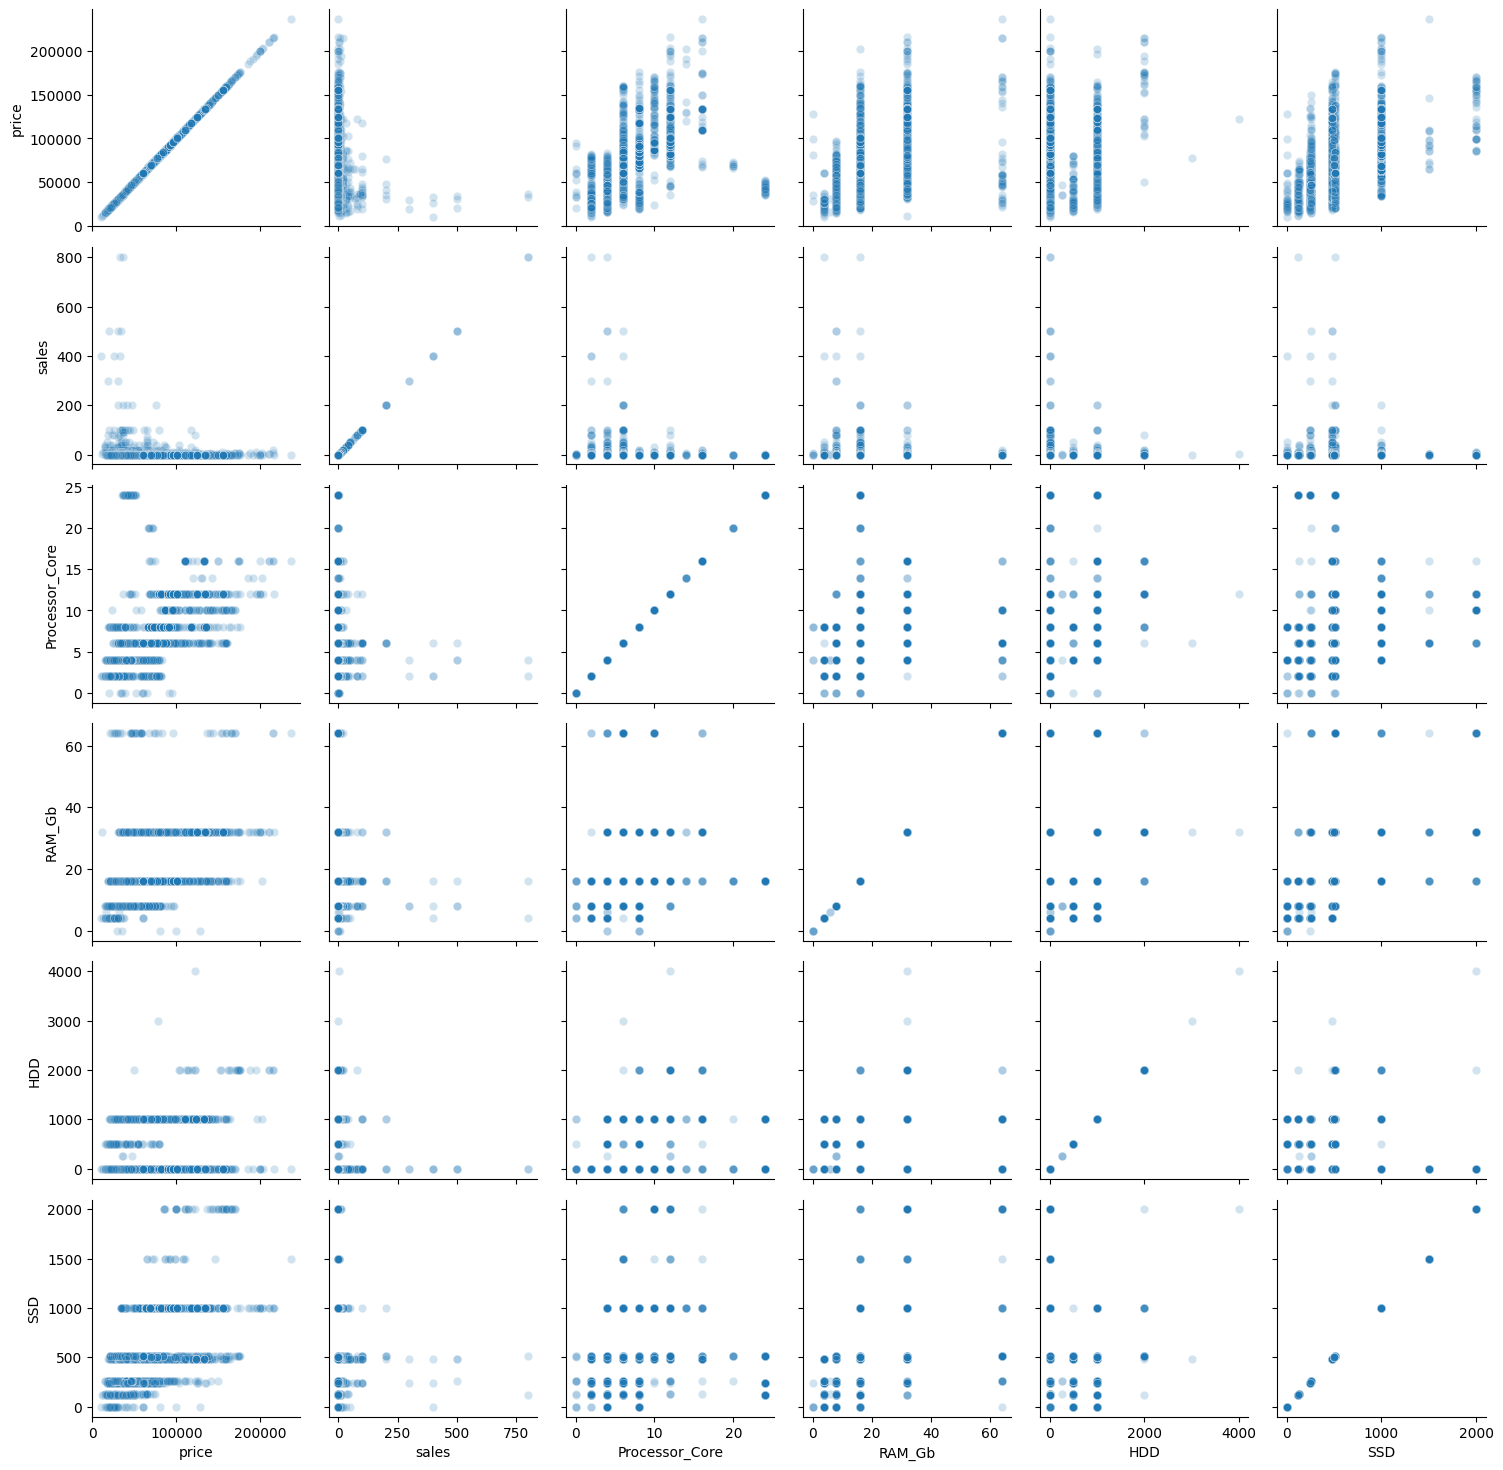

In [ ]:
g = sns.PairGrid(df1[num_cols])
g.map(sns.scatterplot, alpha=.2)

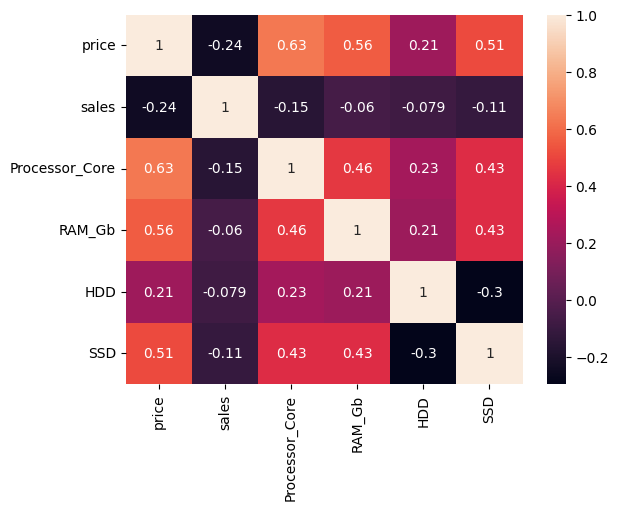

In [ ]:
hm = sns.heatmap(df1[num_cols].corr(method = 'spearman'),annot=True)

In [ ]:
scipy.stats.spearmanr(df1['price'],df1['RAM_Gb'])

SignificanceResult(statistic=0.5551321056275598, pvalue=6.174909994857317e-272)

In [ ]:
for i in num_cols:
  for j in num_cols:
    if i!=j:
      if scipy.stats.spearmanr(df1[i],df1[j])[1]>=0.05:
        print(i,j,'не значима корреляционная связь')

Можно предположить, что:
1. чем выше количество ядер процессора, тем выше цена
2. связь цены с объемом оперативной памяти также заметна
3. связь цены с объемом накопителя HDD слабая, на графике также не прослеживается
4. связь цены с объемом накопителя SSD заметная: чем выше объем накопителя SSD, тем выше цена ПК
5. цена не зависит от количества продаж (что логично), скорее наоборот, далее следует исследовать, зависит ли популярность товара (количество продаж) от цены ПК
6. по всем пунктам связь статистически значима на уровне значимости 0.05

### Анализ категориальных признаков



---



**Гипотеза Н0:** статистически значимые отличия в группах (тип процессора) отсутсвуют

In [ ]:
df1['Type_Processor'].value_counts()

intel          2472
amd             790
не известно     110
Name: Type_Processor, dtype: int64

In [ ]:
df1.groupby('Type_Processor')['price'].mean()

Type_Processor
amd            57154.182278
intel          71597.536812
не известно    60198.581818
Name: price, dtype: float64

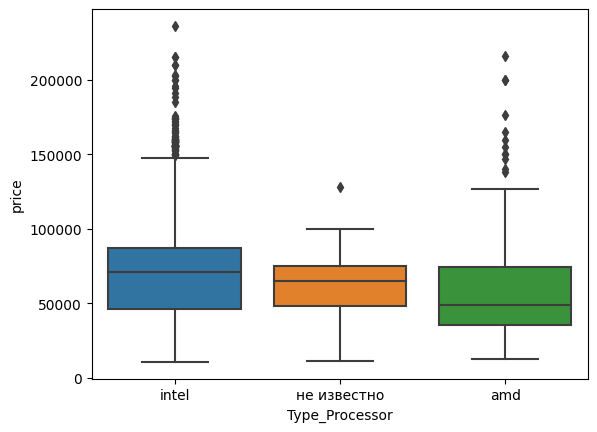

In [ ]:
sns.boxplot(x='Type_Processor', y='price', data=df1)
plt.show()

In [ ]:
for i in df1['Type_Processor'].unique():
  print(i,stats.shapiro(df1[df1['Type_Processor']==i]['price'].dropna())[1])

intel 7.302432051371447e-28
не известно 3.464253381935123e-07
amd 2.206014054264261e-22


Применяем непараметрический критерии сравнения групп

In [ ]:
dfd1=df1[df1['Type_Processor']=='intel']['price']
dfd2=df1[df1['Type_Processor']=='amd']['price']
scipy.stats.mannwhitneyu(dfd1,dfd2)

MannwhitneyuResult(statistic=1226336.0, pvalue=2.1210613106473984e-27)

**Вывод:** Так как полученное значение p-value < 0.05 (уровень значимости), то при уровне знамости 0.05 гипотеза Н0 отклоняется. Следовательно тип процессора оказывает влияние на стоимость ПК


---





---

**Гипотеза Н0:** статистически значимые отличия в группах (тип ОЗУ) отсутсвуют

In [ ]:
df1['Type_RAM'].value_counts()

DDR 4           2974
DDR 3            308
не заполнено      76
DDR 5             14
Name: Type_RAM, dtype: int64

In [ ]:
df1.groupby('Type_RAM')['price'].mean()

Type_RAM
DDR 3            31070.366883
DDR 4            71692.255548
DDR 5           161097.928571
не заполнено     49012.460526
Name: price, dtype: float64

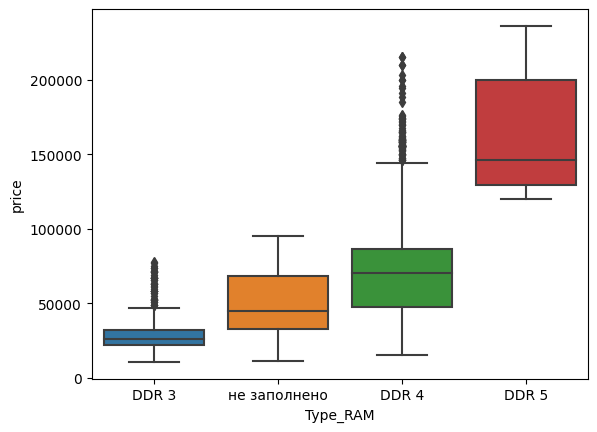

In [ ]:
sns.boxplot(x='Type_RAM', y='price', data=df1)
plt.show()

In [ ]:
for i in df1['Type_RAM'].unique():
  print(i,stats.shapiro(df1[df1['Type_RAM']==i]['price'].dropna())[1])

DDR 3 3.7918195155152337e-20
не заполнено 0.00015536612772848457
DDR 4 6.748534814716243e-32
DDR 5 0.025167902931571007


In [ ]:
dfd1=np.array(df1[df1['Type_RAM']=='DDR 3']['price'])
dfd2=np.array(df1[df1['Type_RAM']=='DDR 4']['price'])
dfd3=np.array(df1[df1['Type_RAM']=='DDR 5']['price'])
stats.mstats.kruskalwallis(dfd1,dfd2,dfd3)

KruskalResult(statistic=599.3588460223723, pvalue=7.093821337606986e-131)

**Вывод:** Так как полученное значение p-value < 0.05 (уровень значимости), то при уровне знамости 0.05 гипотеза Н0 отклоняется. Следовательно тип ОЗУ оказывает влияние на стоимость ПК


---


## 2. От чего зависит популярность

### Анализ целевой переменной (количества продаж)

***Популярные товары*** - те, которые больше всего покупают.
Поэтому для анализа популярности стоит отфильтровать датасет по столбцу sales и оставить только проданные товары

In [ ]:
len(df1[df1.sales!=0])/len(df1)*100

23.576512455516013

Таких товаров только 23.53% от всего количества товаров!



In [ ]:
df_sales = df1[df1.sales!=0]
df_sales.shape

(795, 11)

In [ ]:
df_sales.sales.describe()

count    795.000000
mean      16.213836
std       61.601155
min        1.000000
25%        1.000000
50%        1.000000
75%       10.000000
max      800.000000
Name: sales, dtype: float64

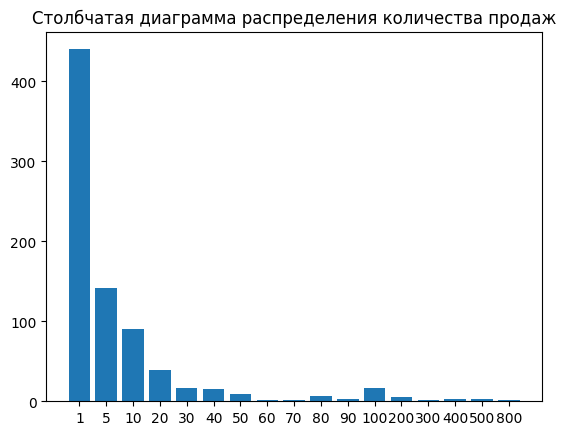

In [ ]:
sales = df_sales.sales.value_counts().sort_index()
plt.bar([str(x) for x in sales.index], sales.values)
plt.title('Столбчатая диаграмма распределения количества продаж')
plt.show()

In [ ]:
np.percentile(df_sales.sales,95)

80.0

Больше всего товаров имеют небольшое количество продаж (меньше 5). И немного товаров имеют высокие продажи. Т.е. относительно немного товаров популярны. 95% товаров имеют не более 80 продаж.

### Анализ числовых признаков

Интересно посмотреть, как меняется цена среди товаров, которые покупают

In [ ]:
df_sales.price.describe()

count       795.000000
mean      57232.933333
std       35979.596314
min       10805.000000
25%       32520.000000
50%       45142.000000
75%       74872.000000
max      214954.000000
Name: price, dtype: float64

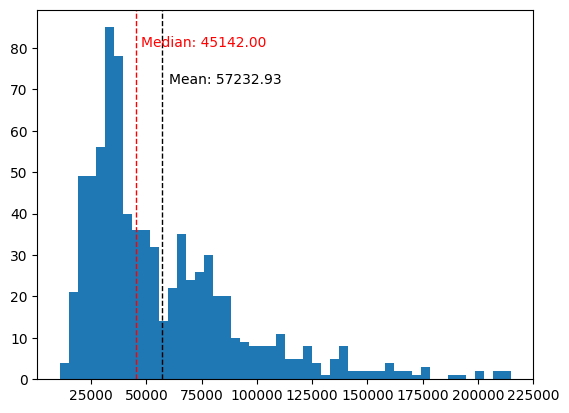

In [ ]:
histogram(df_sales.price)

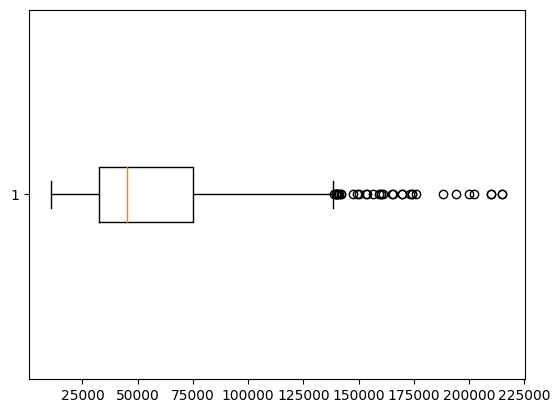

In [ ]:
plt.boxplot(df_sales.price, vert=False)
plt.show()

Ситуация изменилась по сравнению с анализом цены по всему датасету. Распределение скошено вправо (чем дороже ПК, тем меньше он продается). Но и самые популярные по цене ПК - не самые дешевые. Медиана и Среднее заметно отличаются: медианная цена ПК примерно 45000 руб., а средняя цена - около 57000 руб. Дорогие компьютеры (более 130000 руб.) также иногда продаются (выбросы заметны и на боксплот).

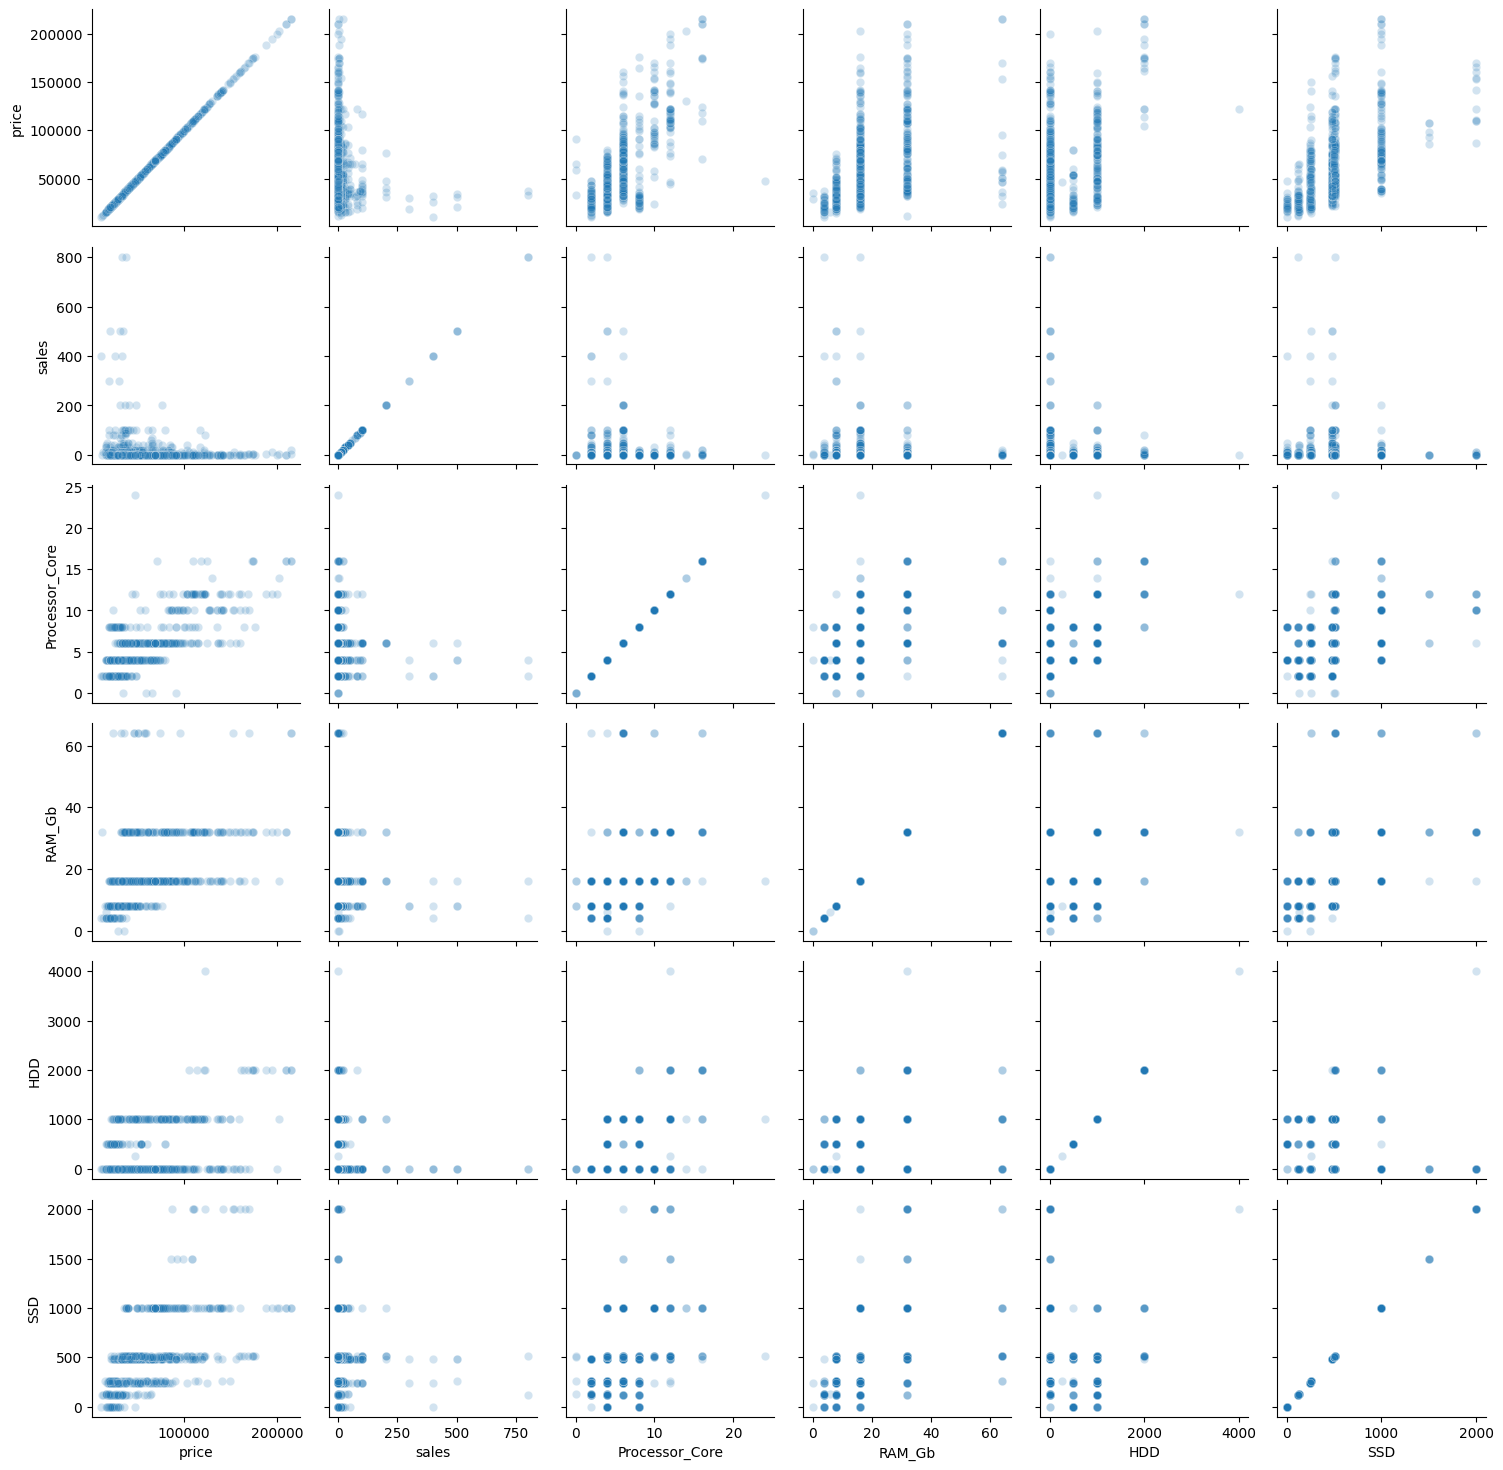

In [ ]:
g = sns.PairGrid(df_sales[num_cols])
g.map(sns.scatterplot, alpha=.2)

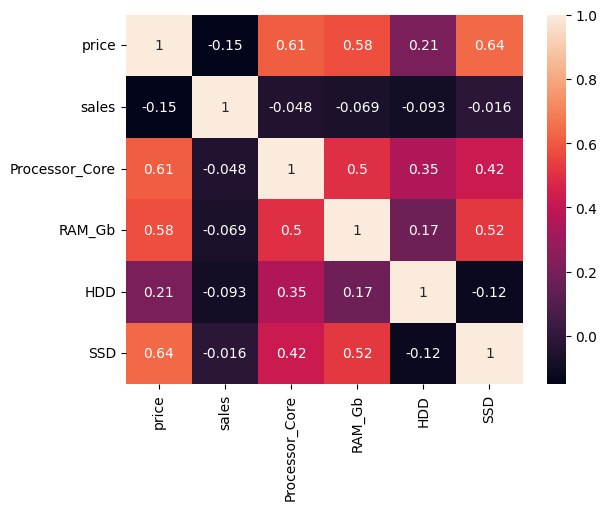

In [ ]:
hm = sns.heatmap(df_sales[num_cols].corr(method = 'spearman'),annot=True)

In [ ]:
for i in num_cols:
  for j in num_cols:
    if i!=j:
      if scipy.stats.spearmanr(df_sales[i],df_sales[j])[1]>=0.05:
        print(i,j,'не значима корреляционная связь')

sales Processor_Core не значима корреляционная связь
sales RAM_Gb не значима корреляционная связь
sales SSD не значима корреляционная связь
Processor_Core sales не значима корреляционная связь
RAM_Gb sales не значима корреляционная связь
SSD sales не значима корреляционная связь


Выводы:
1. связь между признаками и количеством продаж слабая, зачастую отсутствует
2. связь статистически значима на уровне значимости 0.05 между количеством продаж и стоимостью товаров, объемом накопителя HDD; по остальным признакам - статистически не значима
3. чем меньше цена, тем больше продаж (связь отрицательно направленная)

### Анализ категориальных признаков

In [ ]:
WD=pd.crosstab(df_sales['sales'],df_sales['Type_Processor']); WD

Type_Processor,amd,intel,не известно
sales,,,
1,105,329,6
5,47,93,2
10,32,56,2
20,9,29,1
...,...,...,...
300,2,0,0
400,1,2,0
500,1,2,0
800,0,2,0


In [ ]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(WD)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, f, prob))

test Statistics: 33.609248253750394
degrees of freedom: 32
p-value: 0.3893578460637208



In [ ]:
df_sales.sales.describe()

count    795.000000
mean      16.213836
std       61.601155
min        1.000000
25%        1.000000
50%        1.000000
75%       10.000000
max      800.000000
Name: sales, dtype: float64

In [ ]:
df_sales.loc[df_sales[df_sales.sales<=np.percentile(df_sales.sales,50)].index,'sales_category']=1
df_sales.loc[df_sales[(df_sales.sales>np.percentile(df_sales.sales,50))&(df_sales.sales<np.percentile(df_sales.sales,75))].index,'sales_category']=2
df_sales.loc[df_sales[df_sales.sales>=np.percentile(df_sales.sales,75)].index,'sales_category']=3

<ipython-input-1326-7b764d7e789c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales.loc[df_sales[df_sales.sales<=np.percentile(df_sales.sales,50)].index,'sales_category']=1


In [ ]:
df_sales.sales_category.value_counts()

1.0    440
3.0    213
2.0    142
Name: sales_category, dtype: int64

In [ ]:
WD=pd.crosstab(df_sales['sales_category'],df_sales['Type_Processor']); WD

Type_Processor,amd,intel,не известно
sales_category,,,
1.0,105,329,6
2.0,47,93,2
3.0,75,135,3


In [ ]:
WD=pd.crosstab(df_sales[df_sales['Type_Processor']!='не известно']['sales_category'],df_sales[df_sales['Type_Processor']!='не известно']['Type_Processor']); WD

Type_Processor,amd,intel
sales_category,,
1.0,105,329
2.0,47,93
3.0,75,135


In [ ]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(WD)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, f, prob))

test Statistics: 10.897766996657067
degrees of freedom: 2
p-value: 0.004301104200952697



Связь между показателями является статистически значимой на уровне значимости 0.05, т.е. количество покупок так или иначе зависит от типа процессора.

In [ ]:
WD=pd.crosstab(df_sales['sales'],df_sales['Type_RAM']); WD

Type_RAM,DDR 3,DDR 4,DDR 5,не заполнено
sales,,,,
1,80,355,1,4
5,16,123,1,2
10,15,73,0,2
20,4,34,0,1
...,...,...,...,...
300,0,2,0,0
400,2,1,0,0
500,1,2,0,0
800,1,1,0,0


In [ ]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(WD)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, f, prob))

test Statistics: 22.71900494631043
degrees of freedom: 48
p-value: 0.9992826187576805



In [ ]:
WD=pd.crosstab(df_sales[(df_sales['Type_RAM']!='не заполнено')&(df_sales['Type_RAM']!='DDR 5')]['sales_category'],
               df_sales[(df_sales['Type_RAM']!='не заполнено')&(df_sales['Type_RAM']!='DDR 5')]['Type_RAM']); WD

Type_RAM,DDR 3,DDR 4
sales_category,,
1.0,80,355
2.0,16,123
3.0,29,181


In [ ]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(WD)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, f, prob))

test Statistics: 4.69552610044035
degrees of freedom: 2
p-value: 0.09558273703097823



Связь между показателями является статистически не значимой на уровне значимости 0.05, т.е. количество покупок так или иначе не зависит от типа ОЗУ.

### Анализ наиболее популярных комплектующих

Рассмотрим 5% товаров с количеством продаж более 80

In [ ]:
df_sales_5 = df_sales[df_sales.sales > np.percentile(df_sales.sales,95)]
df_sales_5.shape

(34, 12)

In [ ]:
data = df_sales_5.groupby('Type_Processor')['sales'].count()
data

Type_Processor
amd      16
intel    18
Name: sales, dtype: int64

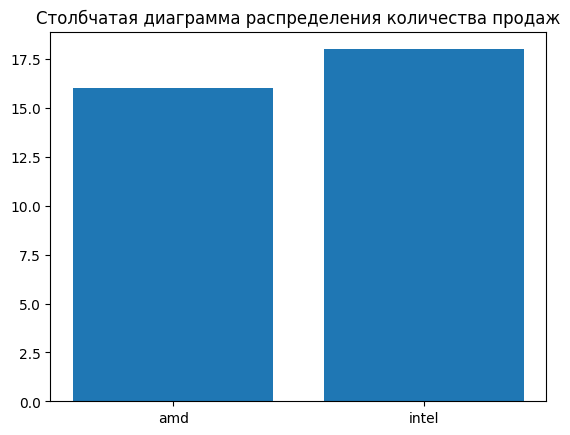

In [ ]:
plt.bar(data.index, data.values)
plt.title('Столбчатая диаграмма распределения количества продаж')
plt.show()

In [ ]:
df_sales_5['Процессор_тип'].value_counts()[:5]

AMD Ryzen 5      12
Intel Core i5     9
Intel Core i3     5
Intel Core i7     2
AMD Athlon        2
Name: Процессор_тип, dtype: int64

In [ ]:
data = df_sales_5.groupby('Type_RAM')['sales'].count()
data

Type_RAM
DDR 3     6
DDR 4    28
Name: sales, dtype: int64

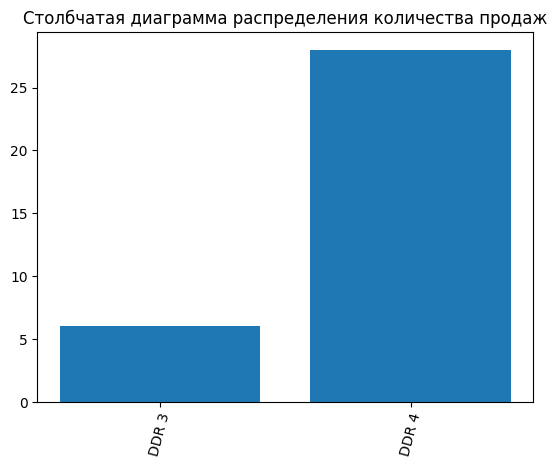

In [ ]:
plt.bar(data.index, data.values)
plt.title('Столбчатая диаграмма распределения количества продаж')
plt.xticks(rotation=75)
plt.show()

In [ ]:
data = df_sales_5.groupby('Processor_Core')['sales'].count()
data

Processor_Core
2      6
4      8
6     19
12     1
Name: sales, dtype: int64

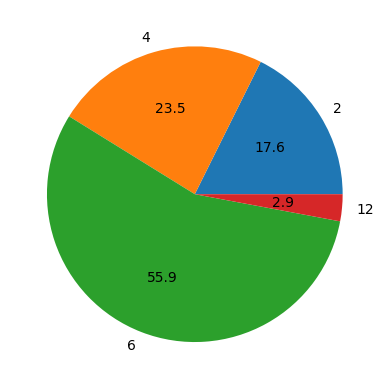

In [ ]:
plt.pie(data, labels=data.index, autopct='%.1f')
plt.show()

Топ-2 продаваемых в составе ПК процессоров по объему ядер: 6 и 4

In [ ]:
data = df_sales_5.groupby('RAM_Gb')['sales'].count()
data

RAM_Gb
4      2
8      9
16    19
32     4
Name: sales, dtype: int64

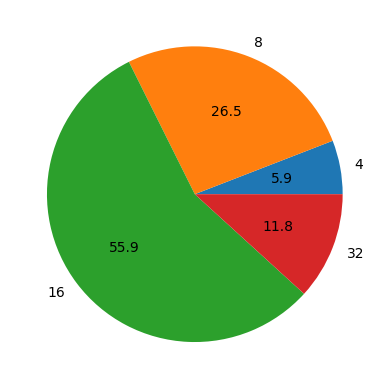

In [ ]:
plt.pie(data, labels=data.index, autopct='%.1f')
plt.show()

Топ-2 продаваемой в составе ПК оперативной памяти по объему: 16 и 8

In [ ]:
data = df_sales_5.groupby('HDD')['sales'].count()
data

HDD
0       28
1000     6
Name: sales, dtype: int64

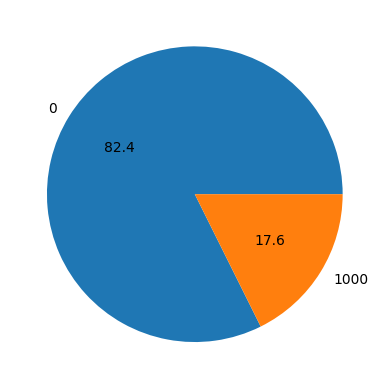

In [ ]:
plt.pie(data, labels=data.index, autopct='%.1f')
plt.show()

In [ ]:
data = df_sales_5.groupby('SSD')['sales'].count()
data

SSD
0        1
120      1
240      6
256      1
480     14
512      9
1000     2
Name: sales, dtype: int64

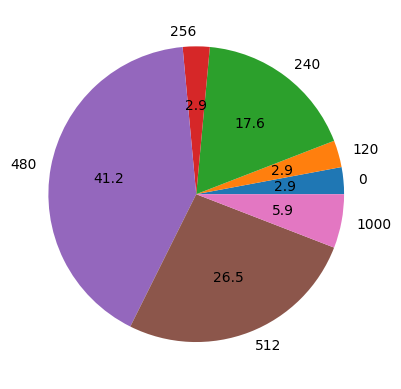

In [ ]:
plt.pie(data, labels=data.index, autopct='%.1f')
plt.show()

Практически все топовые ПК продаются с типом памяти SSD, а не HDD. При этом топ-2 по объему памяти SSD являются жесткие диски на 512 Гб и 480 Гб

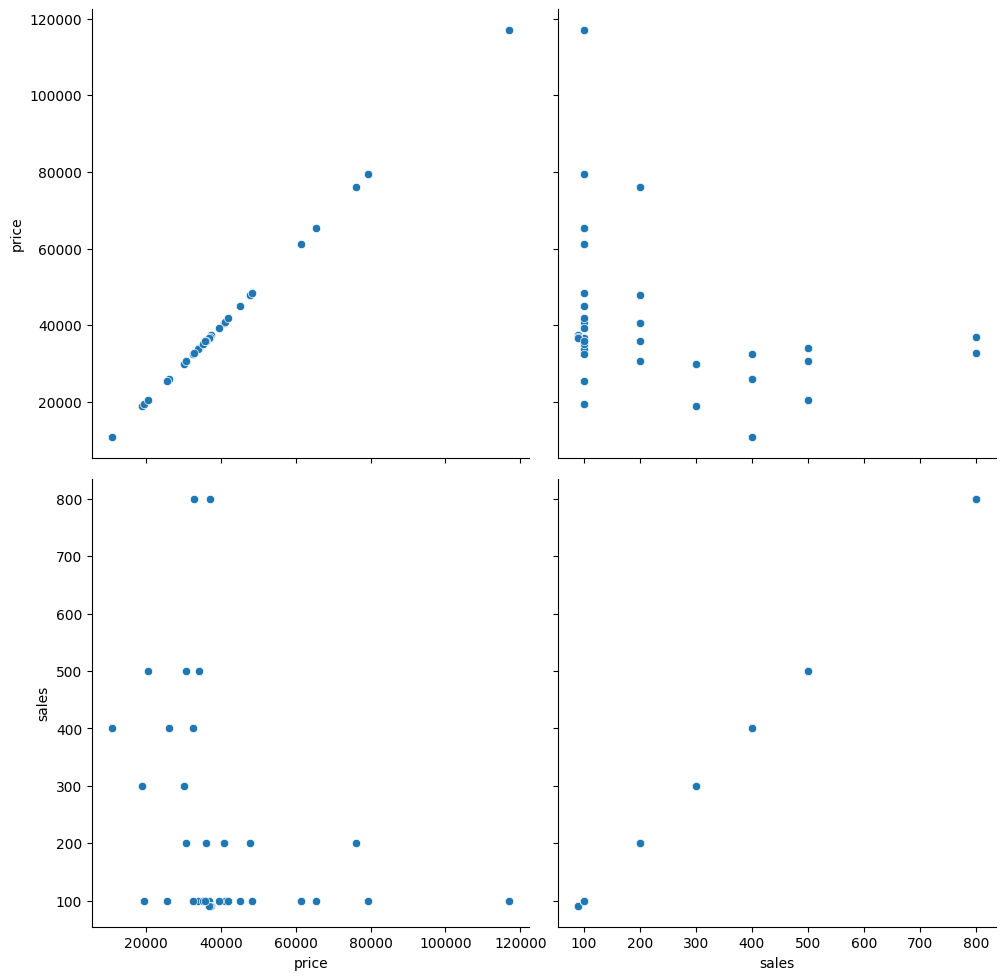

In [ ]:
g = sns.PairGrid(df_sales_5[['price', 'sales']], height=5)
g.map(sns.scatterplot)

Цена наиболее продаваемых ПК находится в районе 30000 - 40000 руб.

Топ наиболее популярных компьютеров:

In [ ]:
df_sales_5[df_sales_5.sales==800]

,product_id,title,price,sales,Процессор_тип,Type_Processor,Processor_Core,Type_RAM,RAM_Gb,HDD,SSD,sales_category
81,43240828,Компьютер Raskat (Intel Pentium G6400/4Gb/120G...,36990,800,Intel Pentium,intel,2,DDR 4,4,0,120,3.0
1249,142153356,Игровой компьютер i7-2600 16Gb SSD 512Gb GT 73...,32900,800,Intel Core i7,intel,4,DDR 3,16,0,512,3.0


# Общие выводы

1. О цене на компьютеры и ее зависимости от комплектующих, о ценовой вилке.
2. О популярности, выраженной в количестве продаж, и ее зависимости от комплектующих.
3. О наиболее популярных комплектующих, продаваемых в составе компьютеров.



1.   Факторы влияющие на цену ПК:


   *   Число ядер процессора (прямая корреляция - с увеличением числа ядер растет и цена)
   *   Объем ОЗУ (прямая корреляция с увеличением обхема ОЗУ растет и цена)
   *   Жесткий диск (с HDD слабая прямая корреляция, с SSD заметная прямая корреляция)
   *   Производитель процессора
   *   Тип ОЗУ

   Ценовая вилка - наиболее часто представленные карточки товара содержат цену от 50 000 до 75 000


2.   Факторы влияющие на популярность (число продаж) ПК:


   *   Стоимость товара (обратная слабая корреляция - с увеличением стоимости товара падает число продаж)
   *   Жесткий диск (с HDD слабая обратная корреляция)
   *   Производитель процессора

   Ценовая вилка в разрезе популярных товаров - наиболее часто представленные карточки товара содержат цену от 30 000 до 35 000

3.   Популярные комплектующие:

    *   Производитель процессора - Intel, AMD
    *   Топ-5 процессоров: AMD Ryzen, Intel Core i5, Intel Core i3, Intel Core i7, AMD Athlon  
    *   Тип ОЗУ: DDR 4, DDR 3
    *   Число ядер процессора: 6 и 4
    *   Объем ОЗУ: 16 и 8
    *   Жесткий диск: приоритет SSD - 512 и 480





# Дополнительная информация

## Точный критерий Фишера

Применяется только для малых частот!!!

In [ ]:
!gdown --id 1dl4eaNZ-HL0OfKzCM65-jD-yOjnWhqpi #данные по аренде квартир
fl = pd.read_csv("App_Rent.csv", sep=';')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dl4eaNZ-HL0OfKzCM65-jD-yOjnWhqpi
To: /content/App_Rent.csv
100% 2.65k/2.65k [00:00<00:00, 16.9MB/s]


In [ ]:
wd=pd.crosstab(fl['furniture'],fl['district']); wd #присутствуют частоты меньше 5

district,1,2,3
furniture,,,
0,8,9,4
1,30,35,44


Код взят с [сайта](https://stackru.com/questions/21118620/tochnyij-kriterij-fishera-dlya-tablitsyi-sopryazhennosti-bolshe-2-na-2)

In [ ]:
import math

def _dfs(mat, pos, r_sum, c_sum, p_0, p):

    (xx, yy) = pos
    (r, c) = (len(r_sum), len(c_sum))

    mat_new = []

    for i in range(len(mat)):
        temp = []
        for j in range(len(mat[0])):
            temp.append(mat[i][j])
        mat_new.append(temp)

    if xx == -1 and yy == -1:
        for i in range(r-1):
            temp = r_sum[i]
            for j in range(c-1):
                temp -= mat_new[i][j]
            mat_new[i][c-1] = temp
        for j in range(c-1):
            temp = c_sum[j]
            for i in range(r-1):
                temp -= mat_new[i][j]
            mat_new[r-1][j] = temp
        temp = r_sum[r-1]
        for j in range(c-1):
            temp -= mat_new[r-1][j]
        if temp <0:
            return
        mat_new[r-1][c-1] = temp

        p_1 = 1
        for x in r_sum:
            p_1 *= math.factorial(x)
        for y in c_sum:
            p_1 *= math.factorial(y)

        n = 0
        for x in r_sum:
            n += x
        p_1 /= math.factorial(n)

        for i in range(len(mat_new)):
            for j in range(len(mat_new[0])):
                p_1 /= math.factorial(mat_new[i][j])
        if p_1 <= p_0 + 0.00000001:
            #print(mat_new)
            #print(p_1)
            p[0] += p_1
    else:
        max_1 = r_sum[xx]
        max_2 = c_sum[yy]
        for j in range(c):
            max_1 -= mat_new[xx][j]
        for i in range(r):
            max_2 -= mat_new[i][yy]
        for k in range(min(max_1,max_2)+1):
            mat_new[xx][yy] = k
            if xx == r-2 and yy == c-2:
                pos_new = (-1, -1)
            elif xx == r-2:
                pos_new = (0, yy+1)
            else:
                pos_new = (xx+1, yy)
            _dfs(mat_new, pos_new, r_sum, c_sum, p_0, p)


def fisher_exact(table):

    row_sum = []
    col_sum = []

    for i in range(len(table)):
        temp = 0
        for j in range(len(table[0])):
            temp += table[i][j]
        row_sum.append(temp)

    for j in range(len(table[0])):
        temp = 0
        for i in range(len(table)):
            temp += table[i][j]
        col_sum.append(temp)

    mat = [[0] * len(col_sum)] * len(row_sum)
    pos = (0, 0)

    p_0 = 1

    for x in row_sum:
        p_0 *= math.factorial(x)
    for y in col_sum:
        p_0 *= math.factorial(y)

    n = 0
    for x in row_sum:
        n += x
    p_0 /= math.factorial(n)

    for i in range(len(table)):
        for j in range(len(table[0])):
            p_0 /= math.factorial(table[i][j])

    p = [0]
    _dfs(mat, pos, row_sum, col_sum, p_0, p)

    return p[0]

In [ ]:
print(fisher_exact(np.array(wd)))

0.16787390807060598


Случай, когда нельзя использовать точный критерий Фишера, так как присутствуют достаточно большие частоты

In [ ]:
WD=pd.crosstab(df_sales['sales_category'],
               df_sales['Type_RAM']); WD

Type_RAM,DDR 3,DDR 4,DDR 5,не заполнено
sales_category,,,,
1.0,80,355,1,4
2.0,16,123,1,2
3.0,29,181,0,3


In [ ]:
print(fisher_exact(np.array(WD))) #результат не подсчитан из-за присутствия больших частот, надо их убрать

OverflowError: ignored

In [ ]:
WD1=pd.crosstab(df_sales[(df_sales['Type_RAM']!='не заполнено')&(df_sales['Type_RAM']!='DDR 5')]['sales_category'],
               df_sales[(df_sales['Type_RAM']!='не заполнено')&(df_sales['Type_RAM']!='DDR 5')]['Type_RAM']); WD1
# таблица сопряженностей с большими частотами для критерия хи-квадрат

Type_RAM,DDR 3,DDR 4
sales_category,,
1.0,80,355
2.0,16,123
3.0,29,181


In [ ]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(WD1)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, f, prob))

test Statistics: 4.69552610044035
degrees of freedom: 2
p-value: 0.09558273703097823



In [ ]:
WD2=pd.crosstab(df_sales[((df_sales['Type_RAM']=='не заполнено')|(df_sales['Type_RAM']=='DDR 5'))]['sales_category'],
               df_sales[((df_sales['Type_RAM']=='не заполнено')|(df_sales['Type_RAM']=='DDR 5'))]['Type_RAM']); WD2
# таблица сопряженностей с малыми частотами для точного критерия Фишера

Type_RAM,DDR 5,не заполнено
sales_category,,
1.0,1,4
2.0,1,2
3.0,0,3


In [ ]:
print(fisher_exact(np.array(WD2)))

1.0


## Литература

• Дарелл Хафф «Как лгать при помощи статистики». На конкретных примерах из жизни приведена иллюстрация такого злоупотребления, как некорректная установка взаимосвязи причины-следствия, «выгодный» или «неполноценный» подбор выборки наблюдений и другие подводные камни статистики.

• Сара Бослаф «Статистика для всех». Название говорит само за себя: детальное погружение в основы статистического анализа данных с предварительным вооружением основными понятиями математического аппарата.

• Уэс Маккини «Python и анализ данных». Книга, написанная автором библиотеки Pandas, иллюстрирует способы преобразования, обработки, очистки данных.

• Дж. Вандер Плас  «Python для сложных задач: наука о данных и машинное обучение». Книга посвящена статистическим и вычислительным методам обработки данных.